In [551]:
import sys
print(sys.executable)

C:\Users\nilad\OneDrive\Desktop\eda\venv\Scripts\python.exe


In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("default")

In [553]:
import os

DATA_PATH = "Indian_Climate_Dataset_2024_2025.csv"
os.path.exists(DATA_PATH) 

True

In [554]:
df = pd.read_csv(DATA_PATH)

os.makedirs("data", exist_ok=True)
df.to_csv("data/raw_backup.csv", index=False)

print("Backup created at → data/raw_backup.csv")


Backup created at → data/raw_backup.csv


In [555]:
pd.set_option("display.max_columns",None)

In [556]:
#Loading the dataset
df = pd.read_csv(DATA_PATH)
df.head()

,Date,City,State,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,AQI_Category,Pressure (hPa),Cloud_Cover (%)
0,2024-01-01,Mumbai,Maharashtra,32.5,18.0,25.2,77.6,0.0,3.3,259,Poor,1020.3,62.1
1,2024-01-01,Delhi,Delhi,25.4,10.7,18.1,84.1,0.0,9.0,130,Moderate,1008.4,46.0
2,2024-01-01,Bengaluru,Karnataka,37.2,30.8,34.0,49.0,3.7,6.6,54,Satisfactory,1008.0,61.3
3,2024-01-01,Chennai,Tamil Nadu,37.2,30.4,33.8,34.2,9.5,9.0,176,Moderate,993.4,70.0
4,2024-01-01,Kolkata,West Bengal,27.4,17.5,22.5,32.2,9.1,9.2,97,Satisfactory,1008.2,56.9


In [557]:
print(df.shape)

(7310, 13)


In [558]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  7310 non-null   object 
 1   City                  7310 non-null   object 
 2   State                 7310 non-null   object 
 3   Temperature_Max (°C)  7310 non-null   float64
 4   Temperature_Min (°C)  7310 non-null   float64
 5   Temperature_Avg (°C)  7310 non-null   float64
 6   Humidity (%)          7310 non-null   float64
 7   Rainfall (mm)         7310 non-null   float64
 8   Wind_Speed (km/h)     7310 non-null   float64
 9   AQI                   7310 non-null   int64  
 10  AQI_Category          7310 non-null   object 
 11  Pressure (hPa)        7310 non-null   float64
 12  Cloud_Cover (%)       7310 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 742.6+ KB
None


In [559]:
df.describe()

,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,Pressure (hPa),Cloud_Cover (%)
count,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000
mean,34.952161,25.006402,29.980192,62.653516,8.231300,13.522763,193.759508,1007.358577,52.630055
std,5.781372,6.476264,5.966698,18.680171,17.758208,6.562729,89.182569,10.109978,27.327729
min,25.000000,10.100000,17.600000,30.000000,0.000000,2.000000,40.000000,990.000000,5.000000
25%,30.000000,19.900000,25.000000,46.400000,0.000000,7.900000,116.000000,998.700000,28.925000
50%,34.900000,25.000000,30.000000,62.700000,0.000000,13.500000,194.000000,1007.300000,52.700000
75%,40.000000,30.000000,35.000000,78.700000,6.300000,19.100000,270.000000,1016.200000,76.200000
max,45.000000,39.800000,42.300000,95.000000,79.900000,25.000000,349.000000,1025.000000,100.000000


In [560]:
df.describe(include =["object"])

,Date,City,State,AQI_Category
count,7310,7310,7310,7310
unique,731,10,10,5
top,2024-01-01,Mumbai,Maharashtra,Moderate
freq,10,731,731,2385


In [561]:
key_fields = {
    "temperature": [c for c in df.columns if "temp" in c.lower()],
    "rainfall": [c for c in df.columns if "rain" in c.lower()],
    "humidity": [c for c in df.columns if "humid" in c.lower()],
    "wind": [c for c in df.columns if "wind" in c.lower()],
    "cloud": [c for c in df.columns if "cloud" in c.lower()]
}

key_fields


{'temperature': ['Temperature_Max (°C)',
  'Temperature_Min (°C)',
  'Temperature_Avg (°C)'],
 'rainfall': ['Rainfall (mm)'],
 'humidity': ['Humidity (%)'],
 'wind': ['Wind_Speed (km/h)'],
 'cloud': ['Cloud_Cover (%)']}

In [562]:
for group, cols in key_fields.items():
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")


In [563]:
df[key_fields["temperature"]
 + key_fields["rainfall"]
 + key_fields["humidity"]
 + key_fields["wind"]
 + key_fields["cloud"]].dtypes


Temperature_Max (°C)    float64
Temperature_Min (°C)    float64
Temperature_Avg (°C)    float64
Rainfall (mm)           float64
Humidity (%)            float64
Wind_Speed (km/h)       float64
Cloud_Cover (%)         float64
dtype: object

In [564]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
)

print(df.columns.tolist())


['date', 'city', 'state', 'temperature_max_(°c)', 'temperature_min_(°c)', 'temperature_avg_(°c)', 'humidity_(%)', 'rainfall_(mm)', 'wind_speed_(km/h)', 'aqi', 'aqi_category', 'pressure_(hpa)', 'cloud_cover_(%)']


In [565]:
keep_cols = ['date', 'city', 'state', 'temperature_avg_(°c)', 'rainfall_(mm)', 'humidity_(%)', 'wind_speed_(km/h)', 'cloud_cover_(%)']

df_clean = df[keep_cols].copy()
print("Shape after selecting fields:", df_clean.shape)
df_clean.head()


Shape after selecting fields: (7310, 8)


,date,city,state,temperature_avg_(°c),rainfall_(mm),humidity_(%),wind_speed_(km/h),cloud_cover_(%)
0,2024-01-01,Mumbai,Maharashtra,25.2,0.0,77.6,3.3,62.1
1,2024-01-01,Delhi,Delhi,18.1,0.0,84.1,9.0,46.0
2,2024-01-01,Bengaluru,Karnataka,34.0,3.7,49.0,6.6,61.3
3,2024-01-01,Chennai,Tamil Nadu,33.8,9.5,34.2,9.0,70.0
4,2024-01-01,Kolkata,West Bengal,22.5,9.1,32.2,9.2,56.9


In [566]:
df.rename(columns={
    "temperature_avg_(°c)": "avg_temperature",
    "rainfall_(mm)": "rainfall",
    "humidity_(%)": "humidity",
    "wind_speed_(km/h)": "wind_speed",
    "cloud_cover_(%)": "cloud_cover"
}, inplace=True)

In [567]:
# date as datetime
if "date" in df_clean.columns:
    df_clean["date"] = pd.to_datetime(df_clean["date"], errors="coerce")

# city & state as clean strings
for c in ["state","city"]:
    if c in df_clean.columns:
        df_clean[c] = (
            df_clean[c]
            .astype(str)
            .str.strip()
            .str.title()
        )


In [568]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Removed {before-after} duplicate rows")

Removed 0 duplicate rows


In [569]:
# 1) Ensure date is parsed in df
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2) Create calendar features in df
df['year']  = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day

# 3) Push into df_clean
df_clean = df[['date','state','city',
               'avg_temperature','rainfall','humidity',
               'wind_speed','cloud_cover',
               'year','month','day']].copy()




In [570]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week.astype(int)

season_map = {
    12:'winter',1:'winter',2:'winter',
    3:'summer',4:'summer',5:'summer',
    6:'monsoon',7:'monsoon',8:'monsoon',
    9:'post-monsoon',10:'post-monsoon',11:'post-monsoon'
}

df['season'] = df['month'].map(season_map)

print("\nCreated new columns:")
print(['year','month','day','week','season'])
df[['date','year','month','season']].head()



Created new columns:
['year', 'month', 'day', 'week', 'season']


,date,year,month,season
0,2024-01-01,2024,1,winter
1,2024-01-01,2024,1,winter
2,2024-01-01,2024,1,winter
3,2024-01-01,2024,1,winter
4,2024-01-01,2024,1,winter


In [571]:
def cap_outliers(s):
    q1, q3 = np.percentile(s.dropna(), [25, 75])
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    return s.clip(lo, hi)

num_cols = ["avg_temperature","rainfall","humidity","wind_speed","cloud_cover"]

for c in num_cols:
    if c in df.columns:
        df[c] = cap_outliers(df[c])


In [572]:
num_cols = ["date","state","city", "avg_temperature","rainfall","humidity","wind_speed","cloud_cover"]
cols_to_drop = [c for c in df.columns if c not in num_cols]
df = df.drop(columns = cols_to_drop, errors= "ignore")


In [573]:
list(df.columns)

['date',
 'city',
 'state',
 'avg_temperature',
 'humidity',
 'rainfall',
 'wind_speed',
 'cloud_cover']

In [574]:
os.makedirs("data", exist_ok=True)

FINAL_PATH = "data/climate_clean_geographic.csv"
df.to_csv(FINAL_PATH, index=False)

print("Saved cleaned dataset →", FINAL_PATH)


Saved cleaned dataset → data/climate_clean_geographic.csv


In [575]:
df = pd.read_csv(FINAL_PATH)
df.head()

,date,city,state,avg_temperature,humidity,rainfall,wind_speed,cloud_cover
0,2024-01-01,Mumbai,Maharashtra,25.2,77.6,0.0,3.3,62.1
1,2024-01-01,Delhi,Delhi,18.1,84.1,0.0,9.0,46.0
2,2024-01-01,Bengaluru,Karnataka,34.0,49.0,3.7,6.6,61.3
3,2024-01-01,Chennai,Tamil Nadu,33.8,34.2,9.5,9.0,70.0
4,2024-01-01,Kolkata,West Bengal,22.5,32.2,9.1,9.2,56.9


In [576]:
if "stress_level" not in df.columns:

    def stress_label(row):
        score = 0
        
        # temperature stress
        if row["avg_temperature"] > 35: score += 2
        elif row["avg_temperature"] > 30: score += 1
        
        # humidity stress
        if row["humidity"] < 30 or row["humidity"] > 85: score += 2
        
        # rainfall stress
        if row["rainfall"] == 0: score += 1
        elif row["rainfall"] > 50: score += 2
        
        # wind & cloud mild contribution
        if row["wind_speed"] > 20: score += 1
        if row["cloud_cover"] < 20: score += 1
        
        if score <= 2: return "Healthy"
        elif score <= 4: return "Mild Stress"
        else: return "Severe Stress"

    df["stress_level"] = df.apply(stress_label, axis=1)

df["stress_level"].value_counts()


stress_level
Healthy          4835
Mild Stress      2160
Severe Stress     315
Name: count, dtype: int64

In [577]:
df.columns

Index(['date', 'city', 'state', 'avg_temperature', 'humidity', 'rainfall',
       'wind_speed', 'cloud_cover', 'stress_level'],
      dtype='object')

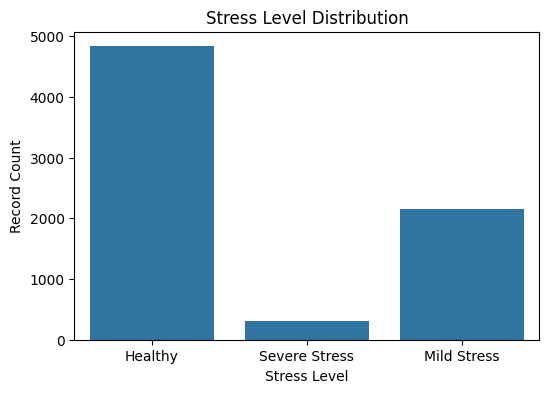

In [578]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="stress_level")
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Record Count")
plt.show()


In [579]:
# show raw counts and percentages for stress_level
counts = df['stress_level'].value_counts(dropna=False)
pct = df['stress_level'].value_counts(normalize=True, dropna=False) * 100
print("Counts:\n", counts)
print("\nPercentages:\n", pct.round(2))


Counts:
 stress_level
Healthy          4835
Mild Stress      2160
Severe Stress     315
Name: count, dtype: int64

Percentages:
 stress_level
Healthy          66.14
Mild Stress      29.55
Severe Stress     4.31
Name: proportion, dtype: float64


# Severe Stress is 4.3% — we will handle imbalance in training by using class weights + SMOTE on the training set

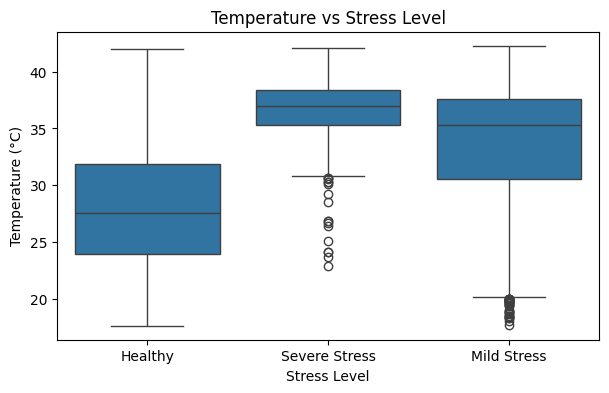

In [580]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="stress_level", y="avg_temperature")
plt.title("Temperature vs Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Temperature (°C)")
plt.show()


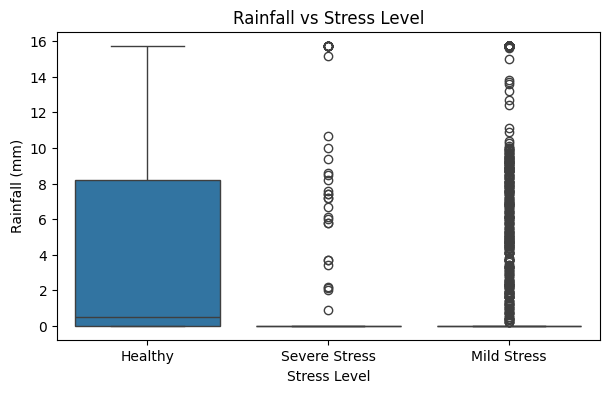

In [581]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="stress_level", y="rainfall")
plt.title("Rainfall vs Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Rainfall (mm)")
plt.show()


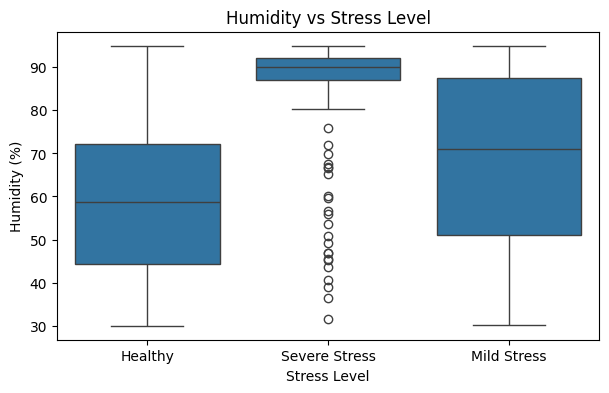

In [582]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="stress_level", y="humidity")
plt.title("Humidity vs Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Humidity (%)")
plt.show()


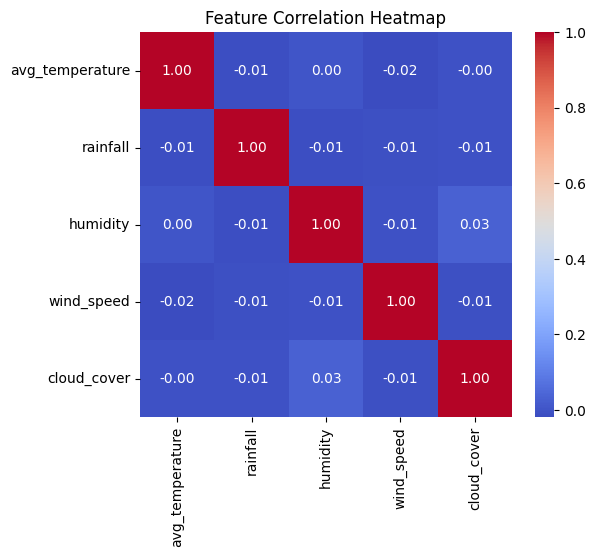

In [583]:
numeric_cols = [
    "avg_temperature",
    "rainfall",
    "humidity",
    "wind_speed",
    "cloud_cover"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


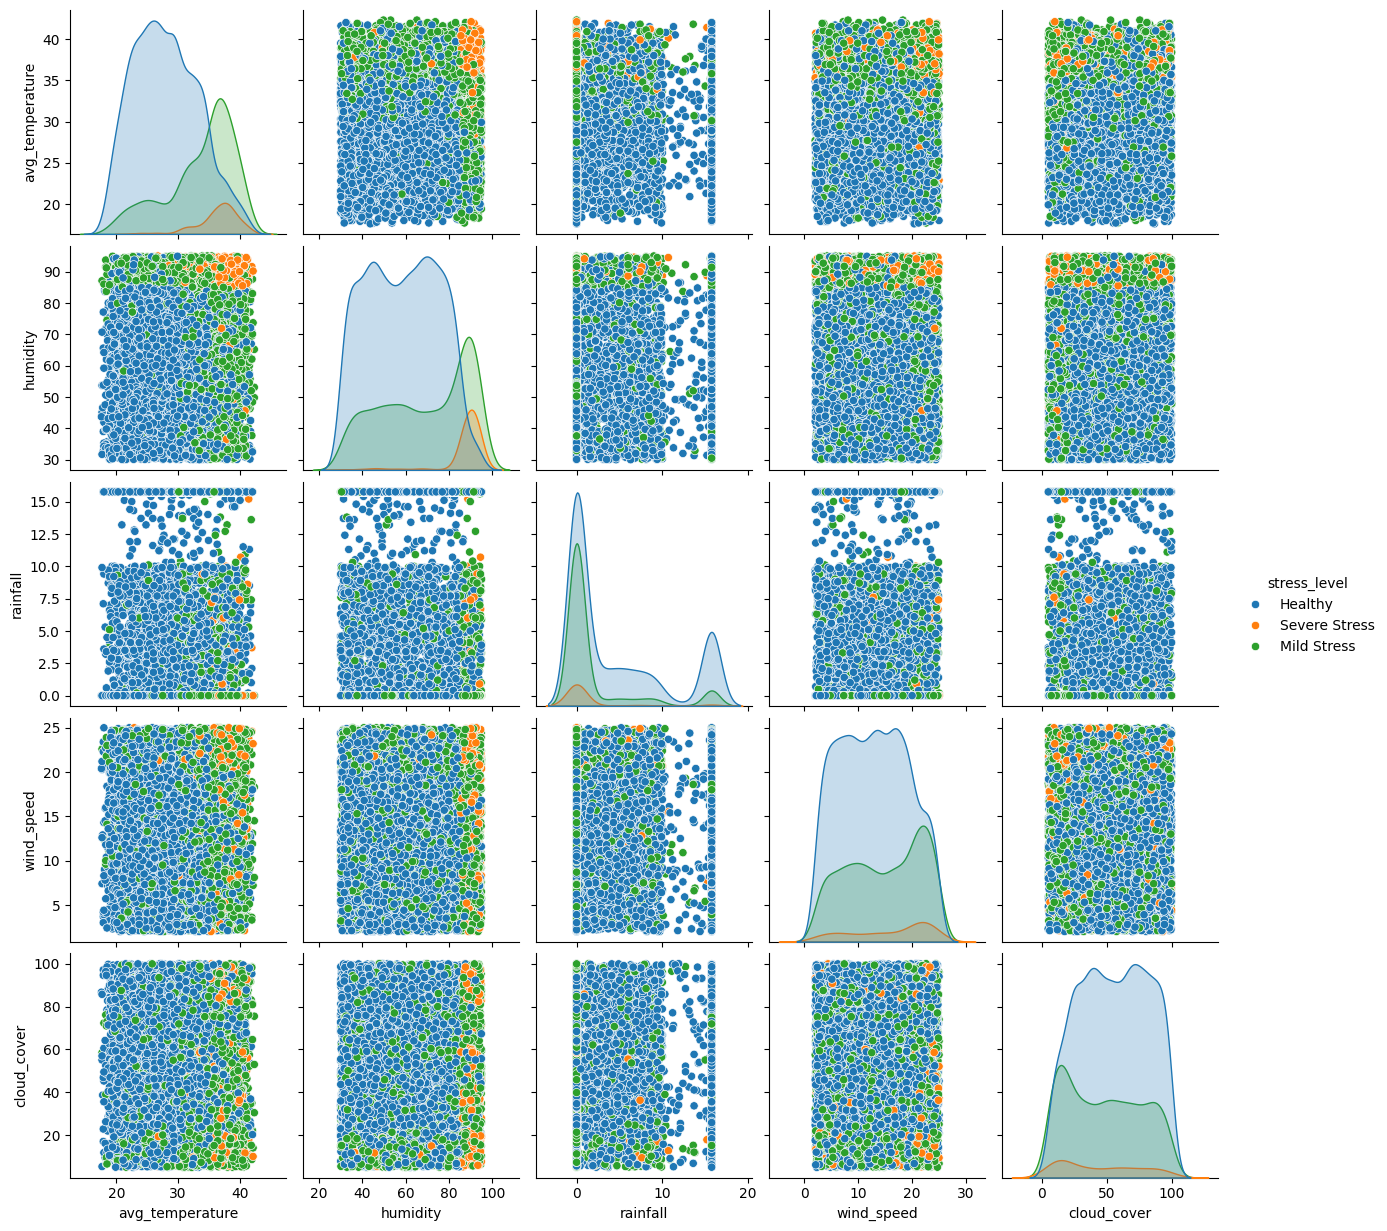

In [584]:
sns.pairplot(df[['avg_temperature','humidity','rainfall','wind_speed','cloud_cover','stress_level']], hue='stress_level')


<Axes: xlabel='month', ylabel='rainfall'>

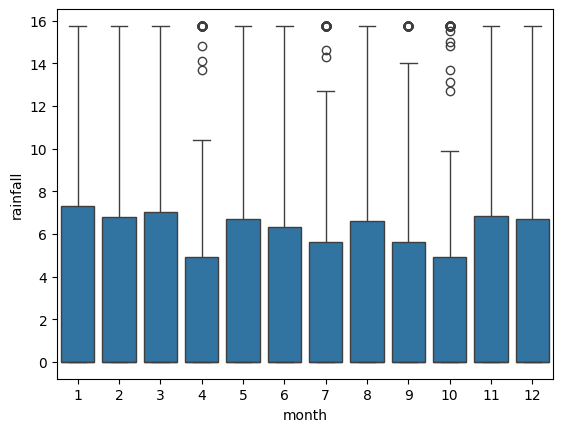

In [585]:
#Seasonal behaviour patterns
df['month'] = pd.to_datetime(df['date']).dt.month
sns.boxplot(x='month', y='rainfall', data=df)
